# Classification from Basic models to Advanced

> * ## LinearSVC
> * ## KNeighborClassifier
> * ## Naive_Bayes
> * ## SGDClassifier (for less data)
> * ## SVC (kernel = rgbf)
> * ## Ensemble methods (RandomForestClassifier , Boosting , Bagging , XGBoost , AdaBoost , GradientBoosting)

### To work on this models we are going to use the data of Ransomevirus from bitcoins related site , we have to find the prediction --> (anomaly (A), signature (S), and synthetic signature (SS) or not ?
### dataset consists following columns :<br>"Time",<br> "Protocol",<br> "Flag",<br> "Family",<br> "Clusters",<br> "SeedAddress", <br>"ExpAddress", <br> "BTC", <br>"USD", <br>"Netflow_Bytes", <br>"IPaddress",<br> "Threats", <br> "Port", <br>"Prediction"
### Prediction column is the target column

#### ok , let's start to cook the code

# Importing important libraries

In [3]:
# importing libraries

import pandas as pd
import numpy as np
import math
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.naive_bayes as nb

from sklearn.svm import LinearSVC , SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier , ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier , BaggingClassifier, VotingClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler , OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score , f1_score
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier


# Getting data ready

In [4]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/ransome.csv")
df.head()

,Time,Protcol,Flag,Family,Clusters,SeddAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,50,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,500,5,A,Bonet,5061,SS
1,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
2,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
3,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
4,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  object
 2   Flag           149043 non-null  object
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  object
 6   ExpAddress     149043 non-null  object
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  object
 11  Threats        149043 non-null  object
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non-null  object
dtypes: int64(6), object(8)
memory usage: 15.9+ MB


In [6]:
df.describe()

,Time,Clusters,BTC,USD,Netflow_Bytes,Port
count,149043.000000,149043.000000,149043.000000,149043.000000,149043.000000,149043.000000
mean,21.466979,2.349295,30.554605,14863.441114,2021.278651,5063.949967
std,15.883598,2.828759,101.447102,26849.434659,2271.420987,2.696011
min,-10.000000,1.000000,1.000000,1.000000,1.000000,5061.000000
25%,8.000000,1.000000,8.000000,512.000000,353.000000,5062.000000
50%,19.000000,1.000000,13.000000,4321.000000,1031.000000,5062.000000
75%,32.000000,2.000000,22.000000,18454.000000,3188.000000,5066.000000
max,96.000000,12.000000,1980.000000,126379.000000,12360.000000,5068.000000


In [7]:
df.columns

Index(['Time', 'Protcol', 'Flag', 'Family', 'Clusters', 'SeddAddress',
       'ExpAddress', 'BTC', 'USD', 'Netflow_Bytes', 'IPaddress', 'Threats',
       'Port', 'Prediction'],
      dtype='object')

In [8]:
target = "Prediction"

features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep = True)

features

['Time',
 'Protcol',
 'Flag',
 'Family',
 'Clusters',
 'SeddAddress',
 'ExpAddress',
 'BTC',
 'USD',
 'Netflow_Bytes',
 'IPaddress',
 'Threats',
 'Port']

# Exploring Data

In [9]:
df.columns

Index(['Time', 'Protcol', 'Flag', 'Family', 'Clusters', 'SeddAddress',
       'ExpAddress', 'BTC', 'USD', 'Netflow_Bytes', 'IPaddress', 'Threats',
       'Port', 'Prediction'],
      dtype='object')

In [10]:
df.nunique()

,0
Time,87
Protcol,3
Flag,9
Family,17
Clusters,9
SeddAddress,6
ExpAddress,7
BTC,1087
USD,5267
Netflow_Bytes,5818


In [11]:
# splitting the features into categorical and numerical features

cf = [] ; nf = [] ;

for i in features:
  if df[i].nunique() <= 15:
    cf.append(i)
  else:
    nf.append(i)
print("\n\033[1mCategorical Features ----> {}".format(cf))
print("\n\033[1mNumerical Features ----> {}".format(nf))


Categorical Features ----> ['Protcol', 'Flag', 'Clusters', 'SeddAddress', 'ExpAddress', 'IPaddress', 'Threats', 'Port']

Numerical Features ----> ['Time', 'Family', 'BTC', 'USD', 'Netflow_Bytes']


# Exploratory Data Visualization

<Figure size 1000x800 with 0 Axes>

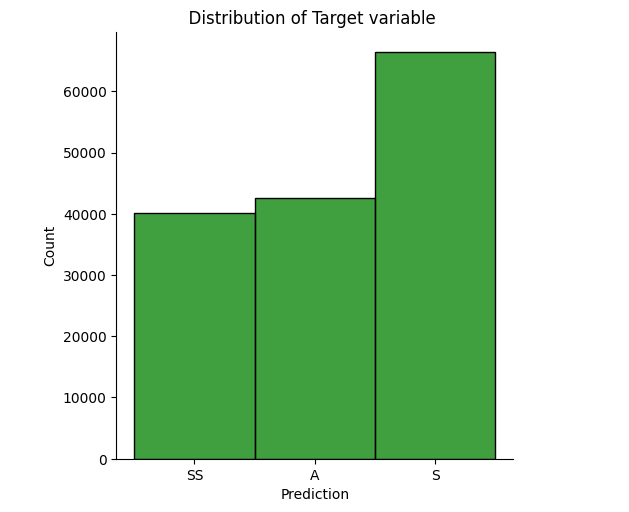

In [12]:
# checking the distribution of the  target variable

plt.figure(figsize = (10,8))

sns.displot(df[target],bins = 30 , color = "green")
plt.title("Distribution of Target variable".center(100))
plt.show()

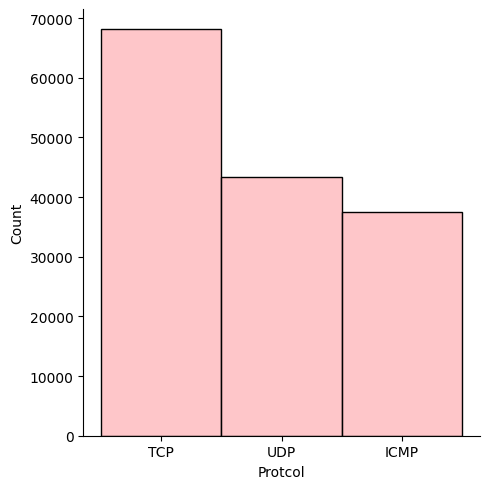

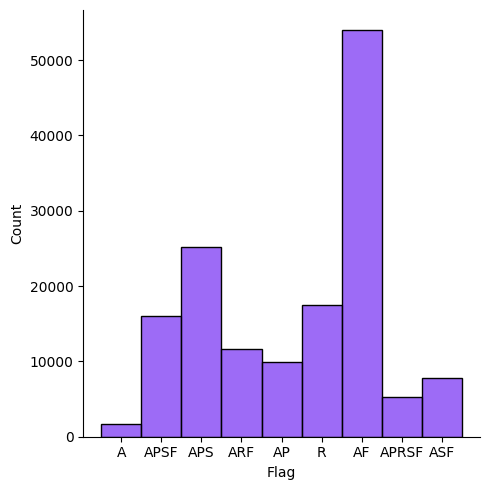

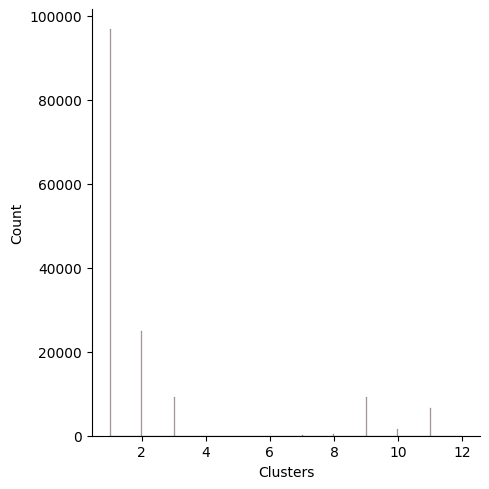

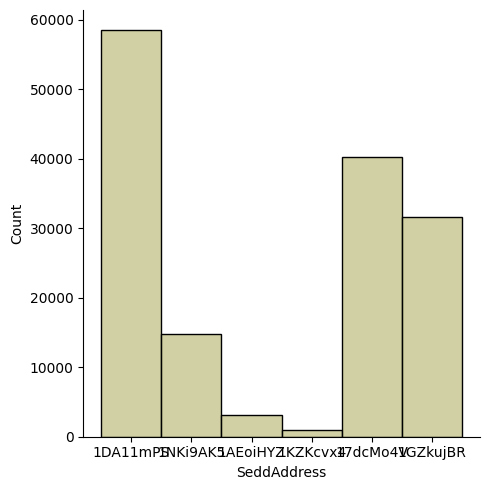

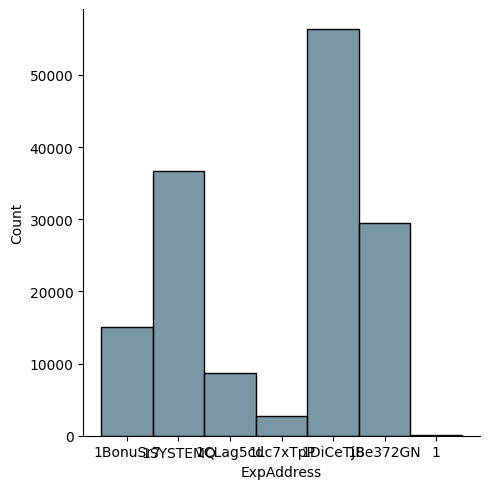

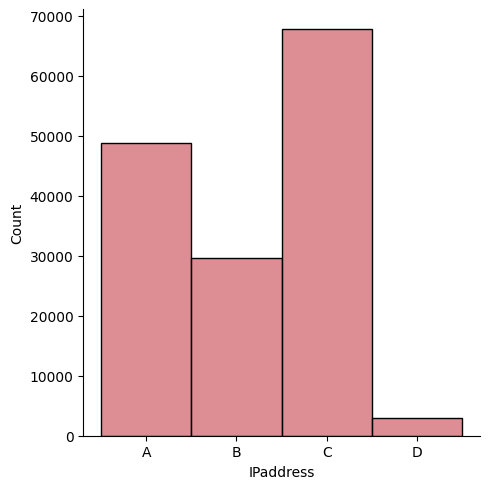

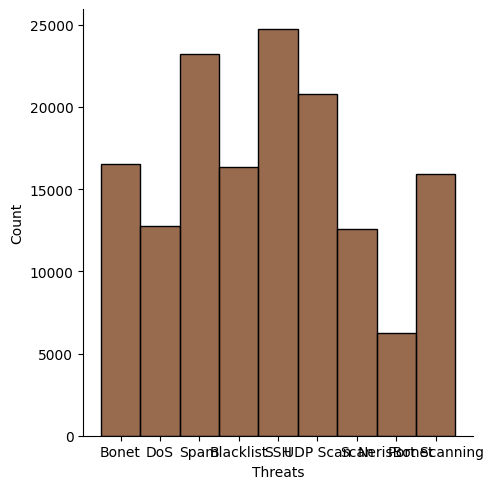

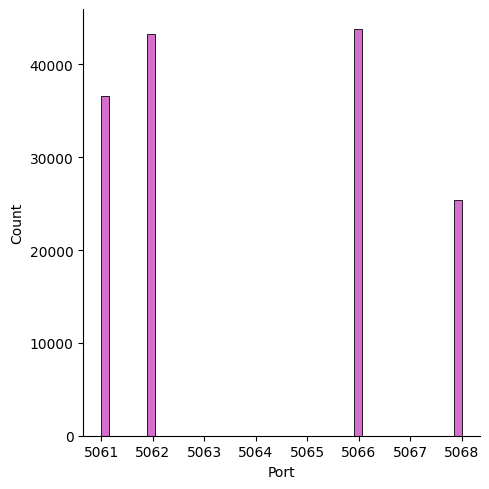

In [13]:
# plotting categorical features

for i in cf:
  sns.displot(df[i],color = np.random.randint([255,255,255])/255)
plt.show()

<Figure size 20000x20000 with 0 Axes>

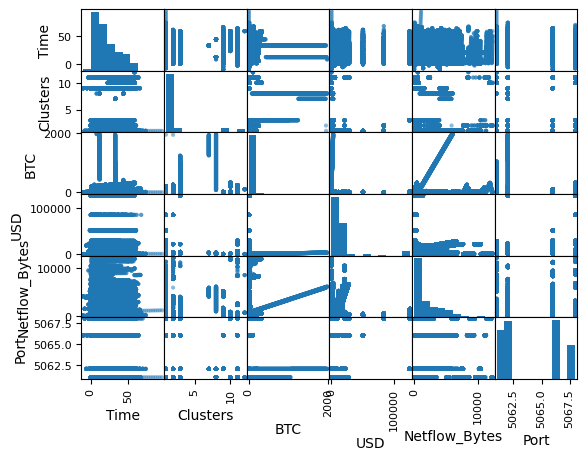

In [14]:
# checking the relationship between features

from pandas.plotting import scatter_matrix
plt.figure(figsize = (200,200))
scatter_matrix(df[features])
plt.show()

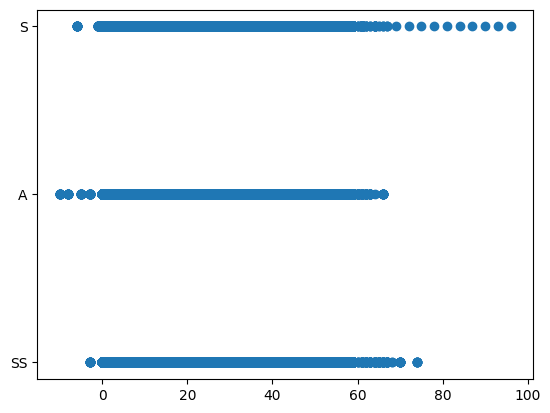

In [15]:
# checking the relation between TIme and Prediction

plt.scatter(df["Time"],df[target])
plt.show()

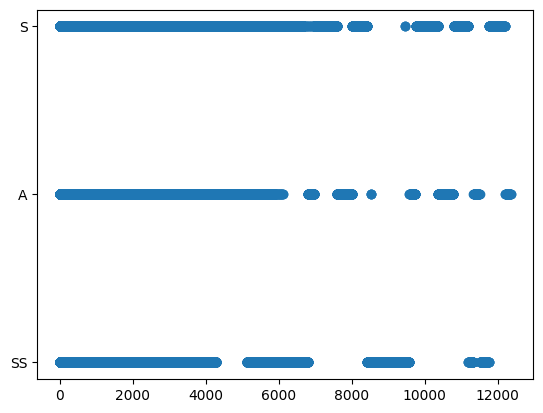

In [16]:
# checking the relation of networkflowbytes and prediction


plt.scatter(df["Netflow_Bytes"],df[target])
plt.show()

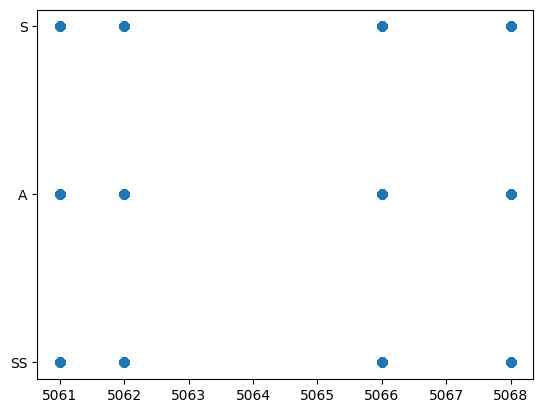

In [17]:
plt.scatter(df["Port"],df[target])
plt.show()

In [18]:
df.columns

Index(['Time', 'Protcol', 'Flag', 'Family', 'Clusters', 'SeddAddress',
       'ExpAddress', 'BTC', 'USD', 'Netflow_Bytes', 'IPaddress', 'Threats',
       'Port', 'Prediction'],
      dtype='object')

In [19]:
# relation among usd and btc
def plot_scatter(x= "BTC",y="USD"):
  plt.scatter(df[x],df[y])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

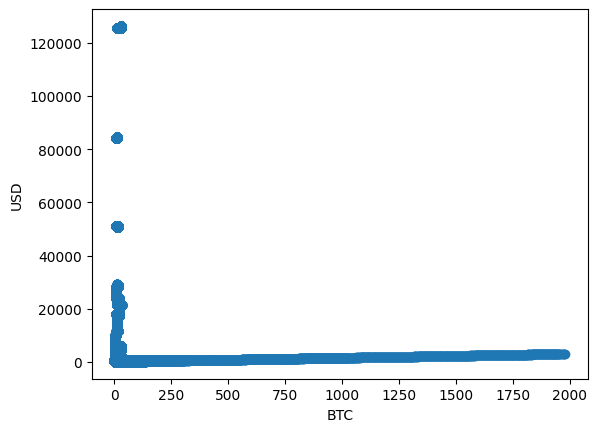

In [20]:
plot_scatter()

In [21]:
def plot_linear(x= None , y = None ):
  plt.figure(figsize=(15,10))
  plt.plot(df[x],df[y],ms = 5, marker ="o")
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

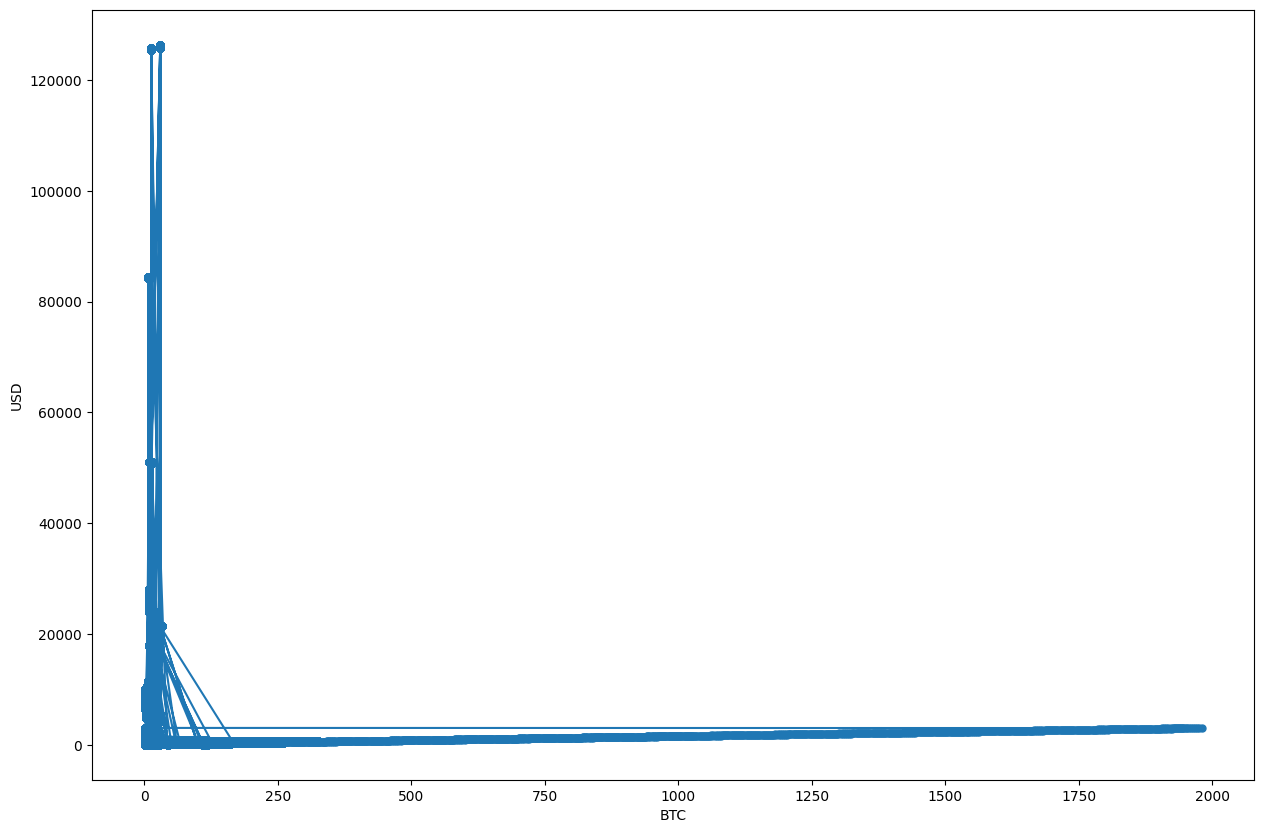

In [22]:
# relation among USD and BTC

plot_linear("BTC","USD")


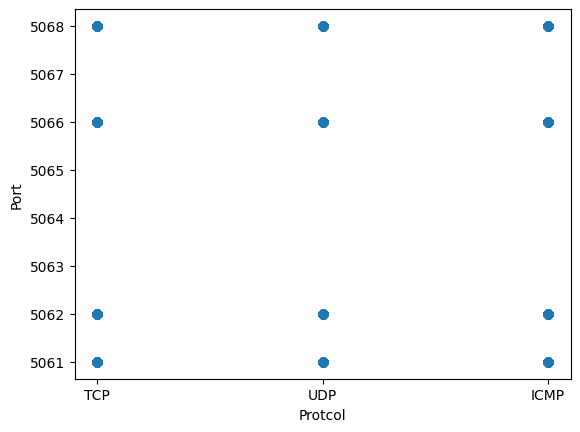

In [23]:
plot_scatter("Protcol","Port")

In [24]:
nf.remove("Family")

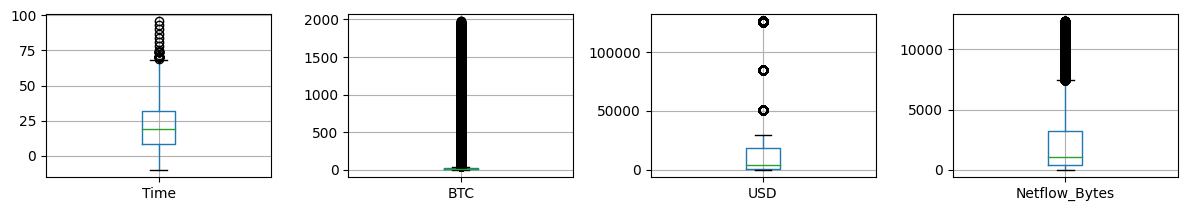

In [25]:
n=5
# nf.remove("Family")
plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

In [26]:
# Removing Duplicates

df2 = df.drop_duplicates()
print("\n\033[1m Before removing of duplicates data set consists {} samples".format(df.shape[0]))
print("\n\033[1m After removing of duplicates data set consists {} samples".format(df2.shape[0]))


 Before removing of duplicates data set consists 149043 samples

 After removing of duplicates data set consists 149043 samples


In [27]:
df.columns

Index(['Time', 'Protcol', 'Flag', 'Family', 'Clusters', 'SeddAddress',
       'ExpAddress', 'BTC', 'USD', 'Netflow_Bytes', 'IPaddress', 'Threats',
       'Port', 'Prediction'],
      dtype='object')

In [28]:
df3 = original_df.copy(deep = True)
for i in range(len(cf)):
  if df3[cf[i]].nunique() <= 8 :
    df3 = pd.concat([df3.drop(cf[i],axis = 1),pd.get_dummies(df3[cf[i]],prefix = str(i))],axis =1)
  else:
    df3 = pd.concat([df3.drop(cf[i],axis = 1),pd.get_dummies(df3[cf[i]],prefix =str(i),drop_first = True)],axis =1)

In [29]:
df3.head()

,Time,Family,BTC,USD,Netflow_Bytes,Prediction,0_ICMP,0_TCP,0_UDP,1_AF,...,6_NerisBonet,6_Port Scanning,6_SSH,6_Scan,6_Spam,6_UDP Scan,7_5061,7_5062,7_5066,7_5068
0,50,WannaCry,1,500,5,SS,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,40,WannaCry,1,504,8,SS,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,30,WannaCry,1,508,7,SS,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,20,WannaCry,1,512,15,SS,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,57,WannaCry,1,516,9,SS,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [30]:
df3.columns

Index(['Time', 'Family', 'BTC', 'USD', 'Netflow_Bytes', 'Prediction', '0_ICMP',
       '0_TCP', '0_UDP', '1_AF', '1_AP', '1_APRSF', '1_APS', '1_APSF', '1_ARF',
       '1_ASF', '1_R', '2_2', '2_3', '2_7', '2_8', '2_9', '2_10', '2_11',
       '2_12', '3_17dcMo4V', '3_1AEoiHYZ', '3_1DA11mPS', '3_1GZkujBR',
       '3_1KZKcvx4', '3_1NKi9AK5', '4_1', '4_18e372GN', '4_1BonuSr7',
       '4_1CLag5cd', '4_1DiCeTjB', '4_1Lc7xTpP', '4_1SYSTEMQ', '5_A', '5_B',
       '5_C', '5_D', '6_Bonet', '6_DoS', '6_NerisBonet', '6_Port Scanning',
       '6_SSH', '6_Scan', '6_Spam', '6_UDP Scan', '7_5061', '7_5062', '7_5066',
       '7_5068'],
      dtype='object')

# Data Manipulation

In [31]:
# OrdinalEncoding of Numerical Features

ord = OrdinalEncoder()

X = df3.drop(target,axis =1)
# x_ord = ord.fit_transform(X[nf])

y= df3[target]

y = pd.Categorical(y).codes
x_train, x_test,y_train,y_test = train_test_split(X,y,
                                                   random_state = 123,
                                                   test_size = 0.1)
x_train.shape , y_train.shape , x_test.shape, y_test.shape

((134138, 53), (134138,), (14905, 53), (14905,))

In [32]:
# ct = ColumnTransformer([("ord",OrdinalEncoder(dtype = np.float16),nf)],remainder ="passthrough")

x_train_trans = OrdinalEncoder().fit_transform(x_train)
x_train = pd.DataFrame(x_train_trans,columns=x_train.columns)

x_test_trans = OrdinalEncoder().fit_transform(x_test)
x_test = pd.DataFrame(x_test_trans,columns=x_test.columns)

x_train_trans.dtype

dtype('float64')

In [33]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134138 entries, 0 to 134137
Data columns (total 53 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             134138 non-null  float64
 1   Family           134138 non-null  float64
 2   BTC              134138 non-null  float64
 3   USD              134138 non-null  float64
 4   Netflow_Bytes    134138 non-null  float64
 5   0_ICMP           134138 non-null  float64
 6   0_TCP            134138 non-null  float64
 7   0_UDP            134138 non-null  float64
 8   1_AF             134138 non-null  float64
 9   1_AP             134138 non-null  float64
 10  1_APRSF          134138 non-null  float64
 11  1_APS            134138 non-null  float64
 12  1_APSF           134138 non-null  float64
 13  1_ARF            134138 non-null  float64
 14  1_ASF            134138 non-null  float64
 15  1_R              134138 non-null  float64
 16  2_2              134138 non-null  floa

In [34]:
x_train["Netflow_Bytes"].dtype

dtype('float64')

In [35]:
# removal of oultiers

df3 = pd.concat([x_train,x_test])

for i in df3.columns:

  q1 = df3[i].quantile(0.25)
  q3 = df3[i].quantile(0.75)
  iqr = q3-q1
  df3 = df3[df3[i] >= q1-(1.5*iqr)]
  df3 = df3[df3[i]<= q3+(1.5*iqr)]
df3.describe()
print("\n\033[1mThe dataset consists {} samples before removal of outliers".format(original_df.shape[0]))
print("\n\033[1mThe dataset consists {} samples after removal of outliers".format(df3.shape[0]))


The dataset consists 149043 samples before removal of outliers

The dataset consists 6982 samples after removal of outliers


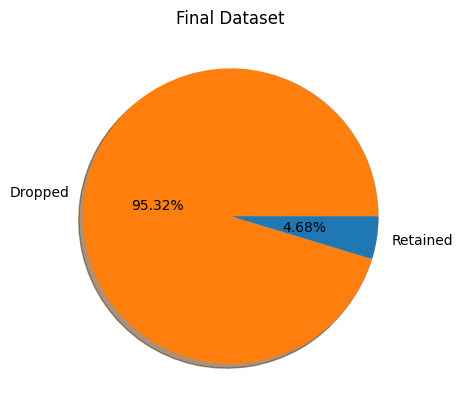

In [36]:
df = df3.copy()
df3.columns=[i.replace('-','_') for i in df3.columns]

plt.title('Final Dataset')
plt.pie([df3.shape[0], original_df.shape[0]-df3.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False,
         autopct='%1.2f%%',pctdistance=0.5, explode=[0,0], shadow=True);


In [37]:
print("\033[1mStandardization on Training set: ".center(100))
x_train_std = StandardScaler().fit_transform(x_train)
x_train_std = pd.DataFrame(x_train_std , columns = x_train.columns)
display(x_train_std.head())
display(x_train_std.describe())

print("\033[1mStandardization on Test set: ".center(100))
x_test_std = StandardScaler().fit_transform(x_test)
x_test_std = pd.DataFrame(x_test_std , columns = x_test.columns)
display(x_test.head())
display(x_test_std.describe())



                               Standardization on Training set:                                 


,Time,Family,BTC,USD,Netflow_Bytes,0_ICMP,0_TCP,0_UDP,1_AF,1_AP,...,6_NerisBonet,6_Port Scanning,6_SSH,6_Scan,6_Spam,6_UDP Scan,7_5061,7_5062,7_5066,7_5068
0,-0.910772,-1.103409,-0.237958,-0.099258,-0.433249,-0.580329,1.089892,-0.640652,-0.753222,-0.266243,...,-0.208513,-0.346452,-0.444999,-0.302611,-0.428858,-0.402707,-0.571319,-0.639529,-0.644647,2.209048
1,-1.225400,-0.690495,-0.253728,0.983355,-0.155411,-0.580329,-0.917522,1.560910,-0.753222,-0.266243,...,-0.208513,-0.346452,2.247194,-0.302611,-0.428858,-0.402707,1.750337,-0.639529,-0.644647,-0.452684
2,-0.029815,0.961162,0.045898,1.671725,-0.851072,-0.580329,-0.917522,1.560910,1.327629,-0.266243,...,-0.208513,2.886406,-0.444999,-0.302611,-0.428858,-0.402707,-0.571319,-0.639529,-0.644647,2.209048
3,1.039919,-0.484038,-0.285268,0.683572,1.770979,-0.580329,1.089892,-0.640652,-0.753222,-0.266243,...,-0.208513,-0.346452,-0.444999,-0.302611,-0.428858,-0.402707,-0.571319,-0.639529,1.551236,-0.452684
4,-0.659070,-0.277581,-0.395657,-0.255372,0.582174,-0.580329,-0.917522,1.560910,1.327629,-0.266243,...,-0.208513,-0.346452,-0.444999,-0.302611,-0.428858,2.483195,-0.571319,-0.639529,-0.644647,2.209048


,Time,Family,BTC,USD,Netflow_Bytes,0_ICMP,0_TCP,0_UDP,1_AF,1_AP,...,6_NerisBonet,6_Port Scanning,6_SSH,6_Scan,6_Spam,6_UDP Scan,7_5061,7_5062,7_5066,7_5068
count,1.341380e+05,1.341380e+05,1.341380e+05,1.341380e+05,1.341380e+05,1.341380e+05,1.341380e+05,1.341380e+05,1.341380e+05,1.341380e+05,...,1.341380e+05,1.341380e+05,1.341380e+05,1.341380e+05,1.341380e+05,1.341380e+05,1.341380e+05,1.341380e+05,1.341380e+05,1.341380e+05
mean,-2.637957e-17,1.117689e-16,7.310001e-18,1.349702e-16,-7.161683e-17,8.520389e-17,-2.073816e-17,3.768888e-17,-2.563798e-17,6.981581e-17,...,-1.313681e-17,-1.787772e-17,5.508987e-17,-2.415479e-17,-2.415479e-17,-4.491943e-17,2.034087e-17,-4.441620e-17,-1.525566e-17,-1.059421e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.728804e+00,-1.929238e+00,-4.114265e-01,-1.260494e+00,-1.074195e+00,-5.803288e-01,-9.175220e-01,-6.406519e-01,-7.532224e-01,-2.662426e-01,...,-2.085128e-01,-3.464516e-01,-4.449993e-01,-3.026110e-01,-4.288576e-01,-4.027070e-01,-5.713186e-01,-6.395294e-01,-6.446472e-01,-4.526837e-01
25%,-8.478467e-01,-6.904949e-01,-3.010377e-01,-9.940827e-01,-8.240697e-01,-5.803288e-01,-9.175220e-01,-6.406519e-01,-7.532224e-01,-2.662426e-01,...,-2.085128e-01,-3.464516e-01,-4.449993e-01,-3.026110e-01,-4.288576e-01,-4.027070e-01,-5.713186e-01,-6.395294e-01,-6.446472e-01,-4.526837e-01
50%,-1.556658e-01,1.353335e-01,-2.221887e-01,-5.457357e-02,-3.970094e-01,-5.803288e-01,-9.175220e-01,-6.406519e-01,-7.532224e-01,-2.662426e-01,...,-2.085128e-01,-3.464516e-01,-4.449993e-01,-3.026110e-01,-4.288576e-01,-4.027070e-01,-5.713186e-01,-6.395294e-01,-6.446472e-01,-4.526837e-01
75%,6.623661e-01,9.611619e-01,-8.026032e-02,9.833549e-01,7.313964e-01,1.723161e+00,1.089892e+00,1.560910e+00,1.327629e+00,-2.662426e-01,...,-2.085128e-01,-3.464516e-01,-4.449993e-01,-3.026110e-01,-4.288576e-01,-4.027070e-01,-5.713186e-01,1.563650e+00,1.551236e+00,-4.526837e-01
max,3.682792e+00,1.374076e+00,1.570533e+01,1.690391e+00,3.019474e+00,1.723161e+00,1.089892e+00,1.560910e+00,1.327629e+00,3.755973e+00,...,4.795869e+00,2.886406e+00,2.247194e+00,3.304572e+00,2.331777e+00,2.483195e+00,1.750337e+00,1.563650e+00,1.551236e+00,2.209048e+00


                                 Standardization on Test set:                                   


,Time,Family,BTC,USD,Netflow_Bytes,0_ICMP,0_TCP,0_UDP,1_AF,1_AP,...,6_NerisBonet,6_Port Scanning,6_SSH,6_Scan,6_Spam,6_UDP Scan,7_5061,7_5062,7_5066,7_5068
0,39.0,16.0,2.0,981.0,633.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,32.0,0.0,4.0,388.0,2880.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,19.0,7.0,15.0,0.0,2538.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,8.0,11.0,8.0,0.0,809.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,47.0,11.0,3.0,1021.0,2362.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


,Time,Family,BTC,USD,Netflow_Bytes,0_ICMP,0_TCP,0_UDP,1_AF,1_AP,...,6_NerisBonet,6_Port Scanning,6_SSH,6_Scan,6_Spam,6_UDP Scan,7_5061,7_5062,7_5066,7_5068
count,1.490500e+04,1.490500e+04,1.490500e+04,1.490500e+04,1.490500e+04,1.490500e+04,1.490500e+04,1.490500e+04,1.490500e+04,1.490500e+04,...,1.490500e+04,1.490500e+04,1.490500e+04,1.490500e+04,1.490500e+04,1.490500e+04,1.490500e+04,1.490500e+04,1.490500e+04,1.490500e+04
mean,-8.342501e-18,-7.055372e-17,2.049872e-17,4.624129e-17,-6.960029e-17,4.814815e-17,3.861386e-17,9.534287e-19,2.335900e-17,3.432343e-17,...,-6.101944e-17,-1.225156e-16,-1.334800e-17,1.358636e-17,5.720572e-18,1.763843e-17,-7.722772e-17,7.627430e-17,-1.229923e-16,7.484415e-17
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,...,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00
min,-1.612605e+00,-1.940723e+00,-5.530019e-01,-1.320370e+00,-1.183117e+00,-5.787706e-01,-9.165825e-01,-6.430133e-01,-7.523166e-01,-2.687471e-01,...,-2.138802e-01,-3.388352e-01,-4.547361e-01,-3.110664e-01,-4.347134e-01,-4.008051e-01,-5.680274e-01,-6.389505e-01,-6.476022e-01,-4.536613e-01
25%,-8.512007e-01,-7.007068e-01,-3.898977e-01,-9.821370e-01,-8.578764e-01,-5.787706e-01,-9.165825e-01,-6.430133e-01,-7.523166e-01,-2.687471e-01,...,-2.138802e-01,-3.388352e-01,-4.547361e-01,-3.110664e-01,-4.347134e-01,-4.008051e-01,-5.680274e-01,-6.389505e-01,-6.476022e-01,-4.536613e-01
50%,-1.532471e-01,3.326399e-01,-2.733947e-01,-1.171335e-01,-3.311595e-01,-5.787706e-01,-9.165825e-01,-6.430133e-01,-7.523166e-01,-2.687471e-01,...,-2.138802e-01,-3.388352e-01,-4.547361e-01,-3.110664e-01,-4.347134e-01,-4.008051e-01,-5.680274e-01,-6.389505e-01,-6.476022e-01,-4.536613e-01
75%,6.716071e-01,9.526478e-01,-6.368935e-02,1.006805e+00,7.855955e-01,1.727800e+00,1.091009e+00,1.555178e+00,1.329228e+00,-2.687471e-01,...,-2.138802e-01,-3.388352e-01,-4.547361e-01,-3.110664e-01,-4.347134e-01,-4.008051e-01,-5.680274e-01,1.565066e+00,1.544158e+00,-4.536613e-01
max,3.019269e+00,1.365986e+00,7.648809e+00,1.721303e+00,2.384935e+00,1.727800e+00,1.091009e+00,1.555178e+00,1.329228e+00,3.720970e+00,...,4.675514e+00,2.951287e+00,2.199078e+00,3.214747e+00,2.300366e+00,2.494978e+00,1.760479e+00,1.565066e+00,1.544158e+00,2.204288e+00


In [ ]:
# # removal of oultiers

# df3 = pd.concat([x_train_std,x_test_std])

# for i in df3.columns:
#   q1 = df3[i].quantile(0.25)
#   q3 = df3[i].quantile(0.75)
#   iqr = q3-q1
#   df3 = df3[df3[i] >= q1-(1.5*iqr)]
#   df3 = df3[df3[i]<= q3+(1.5*iqr)]
# df3.describe()
# print("\n\033[1mThe dataset consists {} samples before removal of outliers".format(original_df.shape[0]))
# print("\n\033[1mThe dataset consists {} samples after removal of outliers".format(df3.shape[0]))

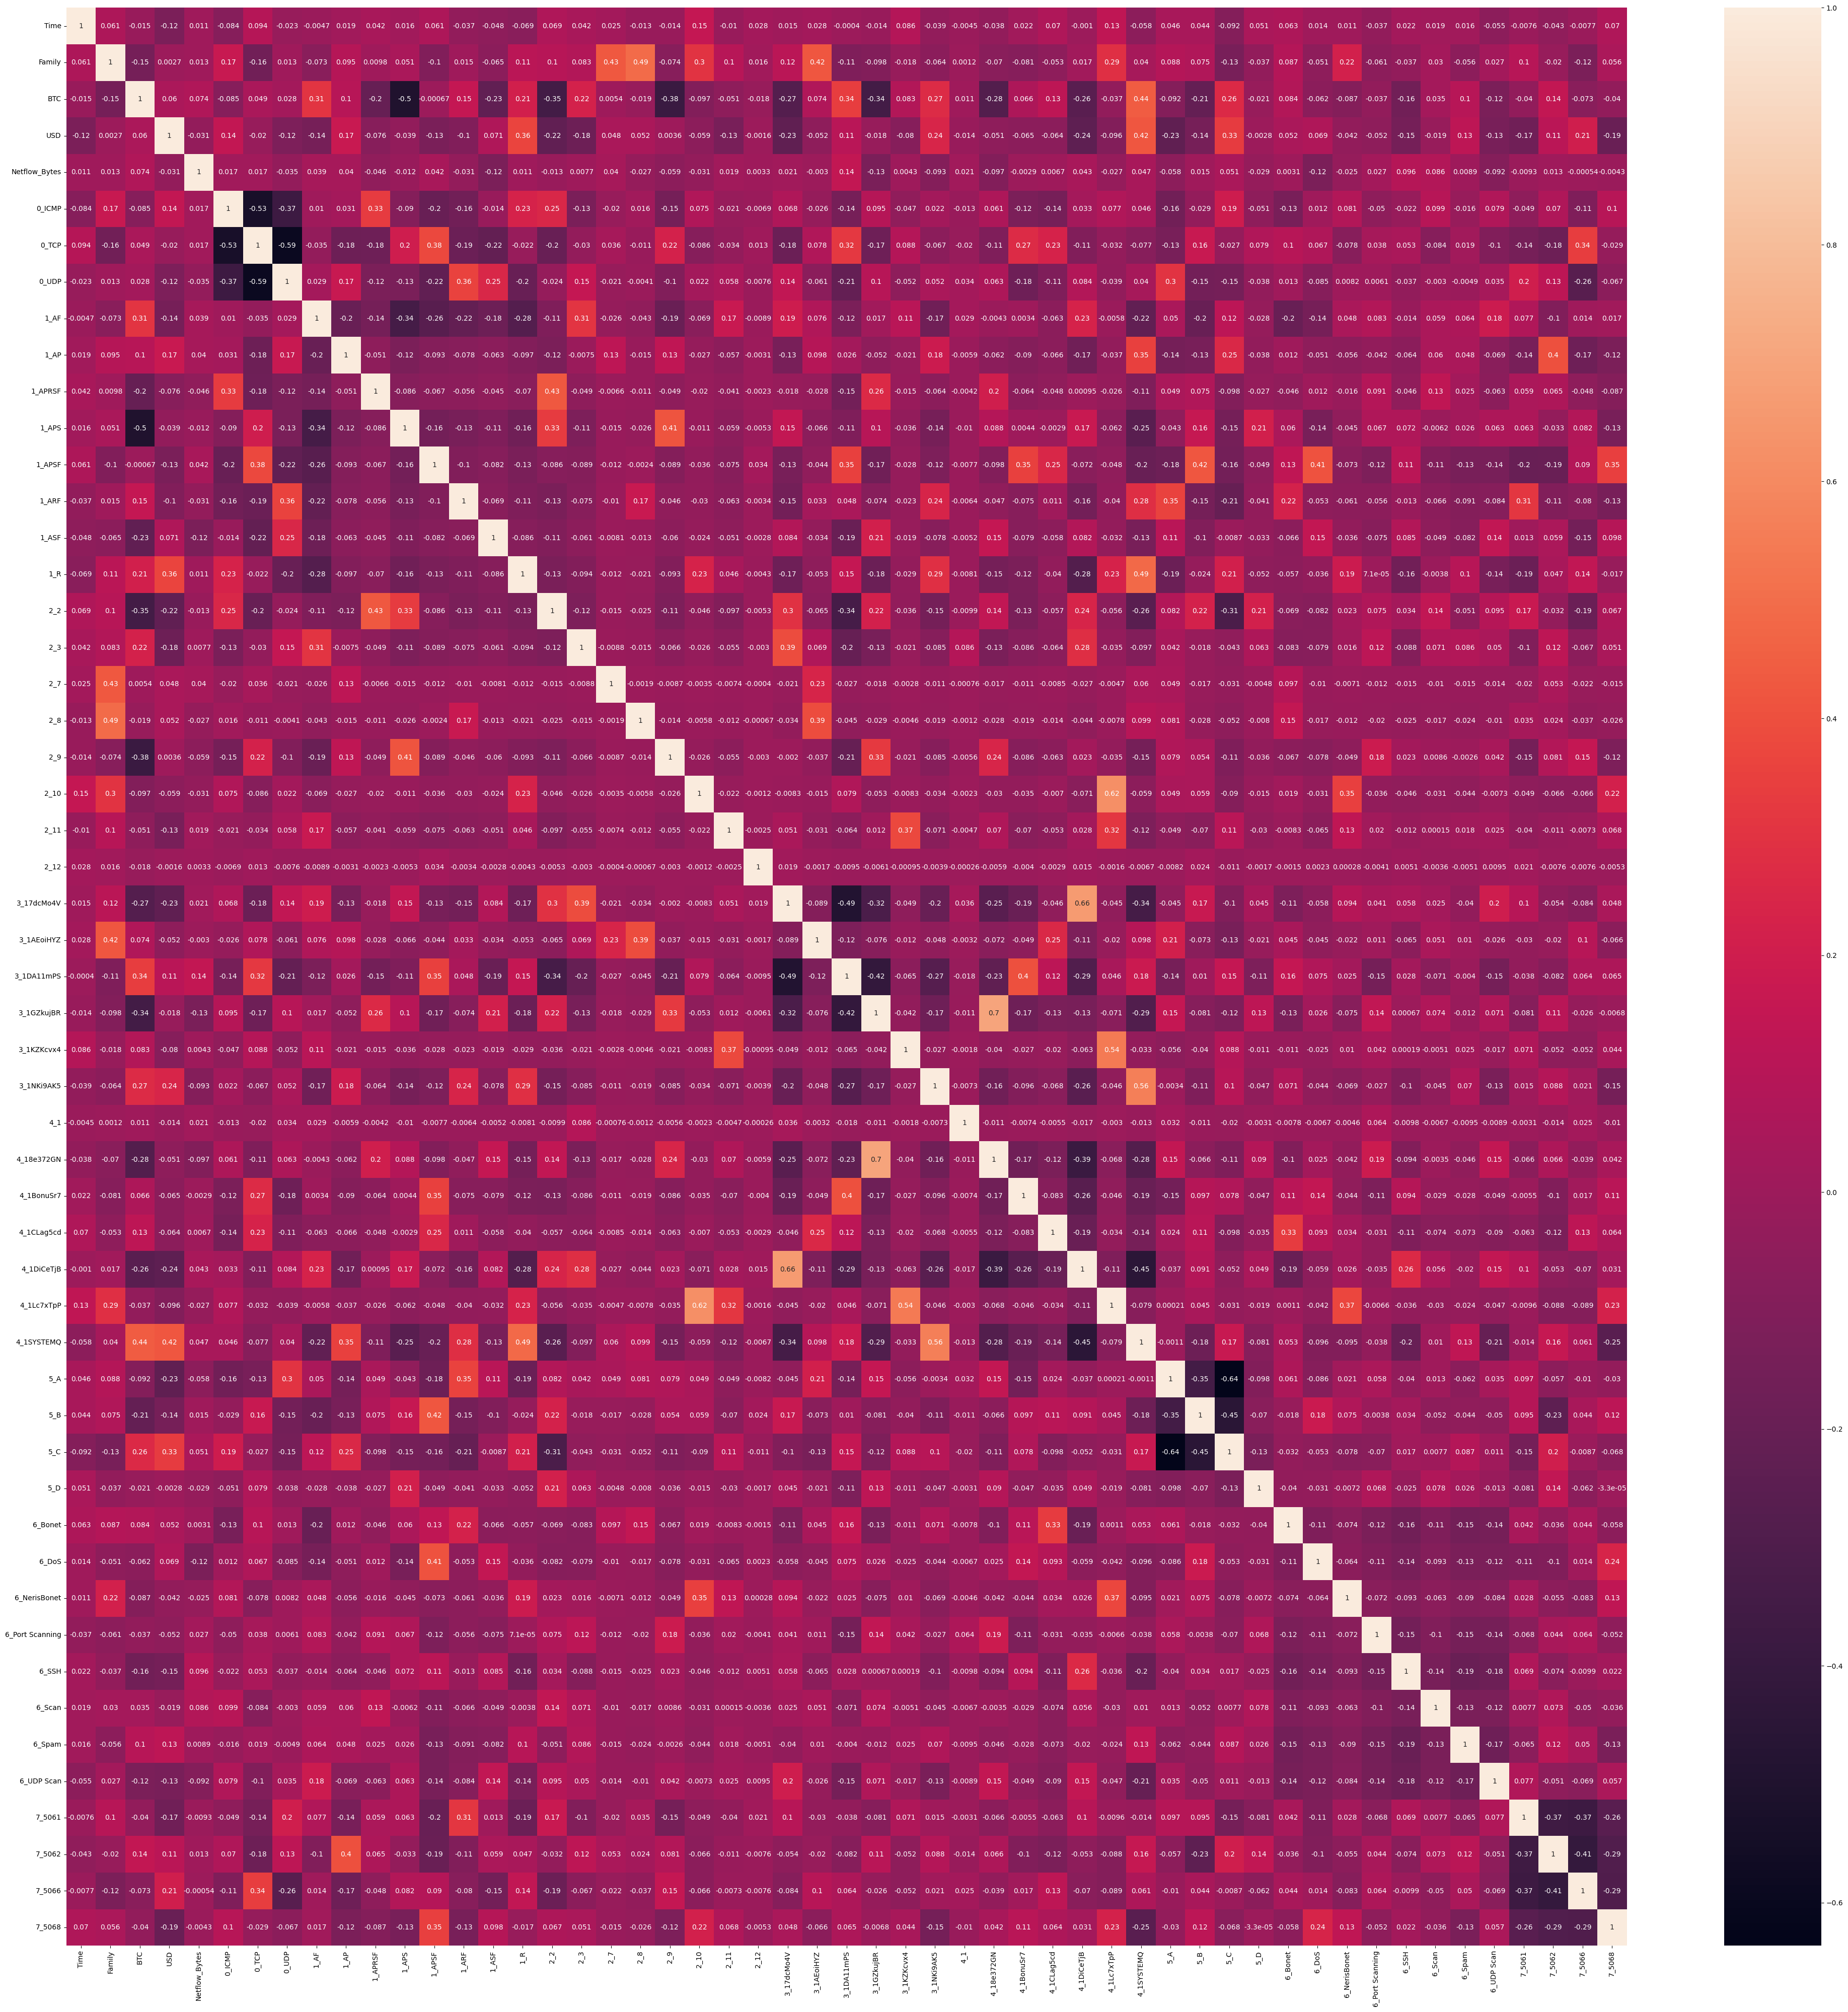

In [ ]:
# Observing Correlation Matrix
plt.figure(figsize = (50,50))
df4 = pd.concat([x_train_std,x_test_std])
sns.heatmap(df4.corr(),annot = True ,color = "b")
plt.show()

In [38]:
## Creating an Evaluation Matrix

Comparison_matrix = pd.DataFrame(np.zeros((10,4)),columns = ["Train_accuracy","Test_accuracy","Train_f1","Test_f1"])


def Evaluation(x_train,x_test,y_train,y_test,y_pred1,y_pred2,n):
  plt.figure(figsize=(15,6))
  cols =  x_train.loc[:,x_train.nunique()>15].columns.values
  fcc = np.random.choice(cols,3,replace = True)
  print("-"*30+">"+"Testing plots of diffferent features"+"<"+"-"*30)
  print()
  for i in range(len(fcc)):
    plt.subplot(2,3,i+1)
    plt.scatter(x_test[fcc[i]],y_test,label="Actual")
    plt.scatter(x_test[fcc[i]],y_pred2,label = "Predictions")
    plt.title(fcc[i])

  plt.show()

  print("METRICS OF MODEL".center(100))
  print(f"Training accuracy --------> {round(accuracy_score(y_train,y_pred1),4)}")
  print(f"Testing accuracy --------> {round(accuracy_score(y_test,y_pred2),4)}")
  print(f"Training f1_Score ---------> {round(f1_score(y_train,y_pred1,average='weighted'),4)}")
  print(f"Testing f1_Score ---------> {round(f1_score(y_test,y_pred2,average='weighted'),4)}")


  Comparison_matrix.loc[n,"Train_accuracy"] = round(accuracy_score(y_train,y_pred1),4)
  Comparison_matrix.loc[n,"Test_accuracy"] = round(accuracy_score(y_test,y_pred2),4)
  Comparison_matrix.loc[n,"Train_f1"] = round(f1_score(y_train,y_pred1,average="weighted"),4)
  Comparison_matrix.loc[n,"Test_f1"] = round(f1_score(y_test,y_pred2,average="weighted"),4)
  print("Errors".center(100))

  sns.displot(y_test-y_pred2)
  plt.title("ERROR Terms")
  plt.xlabel("Error Values")
  plt.show()
  # plt.subplot(1,2,2)
  # plt.scatter(y_train,preds1)
  # plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
  # plt.title('Test vs Prediction')
  # plt.xlabel('y_test')
  # plt.ylabel('y_pred')
  # plt.show()

# Predictive Modelling

## Starting with LinearSVC

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


------------------------------>Testing plots of diffferent features<------------------------------



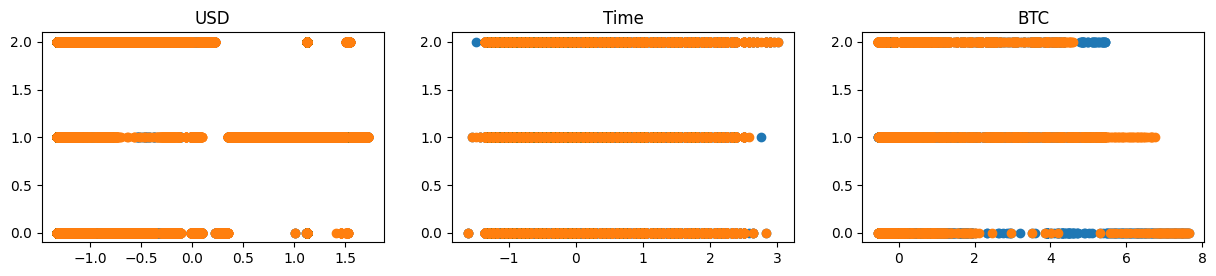

                                          METRICS OF MODEL                                          
Training accuracy --------> 0.896
Testing accuracy --------> 0.8986
Training f1_Score ---------> 0.8934
Testing f1_Score ---------> 0.896
                                               Errors                                               


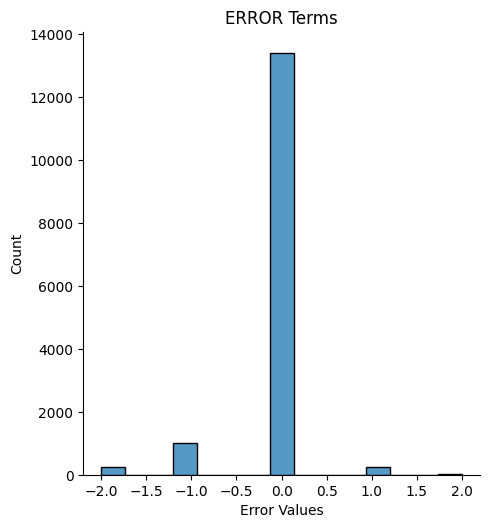

In [43]:
# LinearSVC
lnrsvc = LinearSVC(C= 110,loss = "squared_hinge",verbose = 2) # Increase C if SVC underfitting otherwise decrease the value of C when overfitting
lnrsvc.fit(x_train_std,y_train)
y_pred1 = lnrsvc.predict(x_train_std)
y_pred2 = lnrsvc.predict(x_test_std)
Evaluation(x_train_std,x_test_std,y_train,y_test,y_pred1,y_pred2,0)

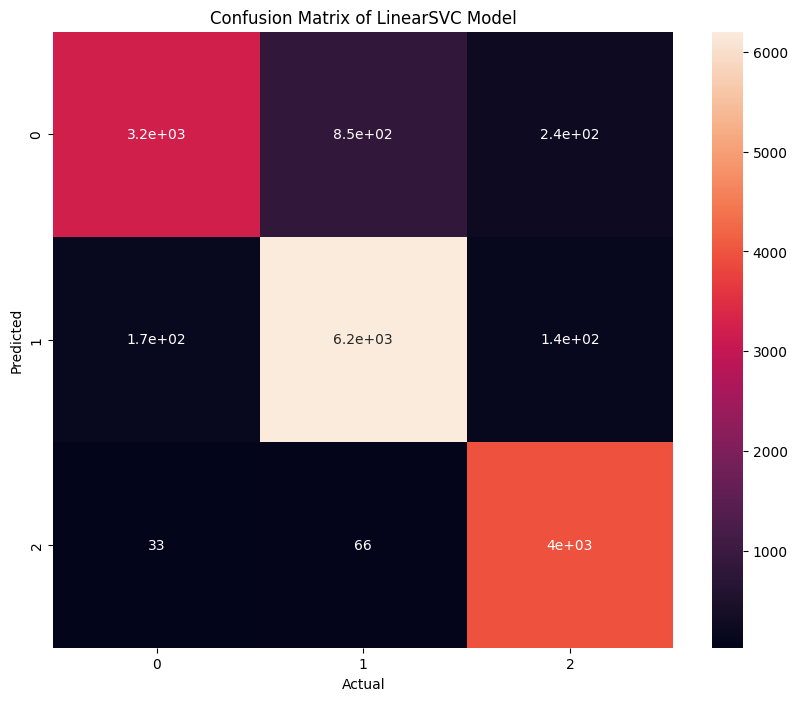

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)
plt.title("Confusion Matrix of LinearSVC Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## KNearestNeighbors

------------------------------>Testing plots of diffferent features<------------------------------



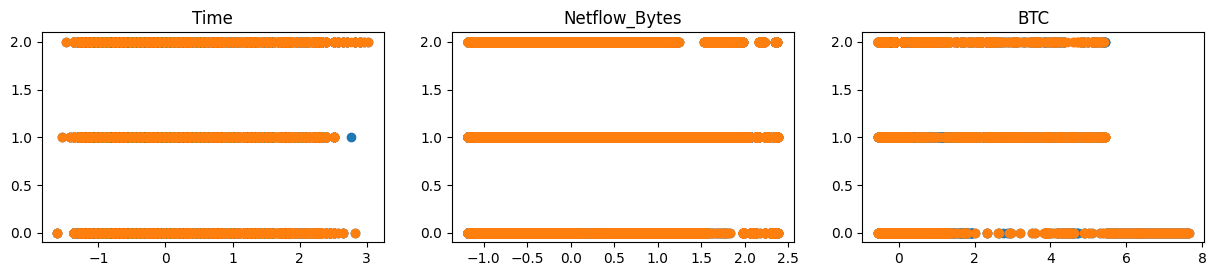

                                          METRICS OF MODEL                                          
Training accuracy --------> 0.9976
Testing accuracy --------> 0.9759
Training f1_Score ---------> 0.9976
Testing f1_Score ---------> 0.9759
                                               Errors                                               


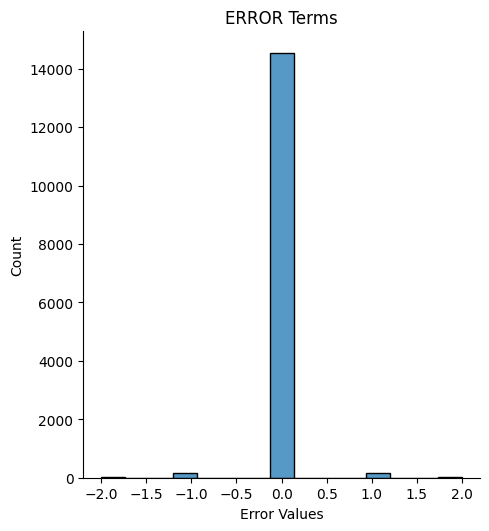

In [45]:
# KNearestNeighbors
knn = KNeighborsClassifier(n_neighbors=70,weights = "distance")
knn.fit(x_train_std,y_train)
y_pred1 = knn.predict(x_train_std)
y_pred2 = knn.predict(x_test_std)
Evaluation(x_train_std,x_test_std,y_train,y_test,y_pred1,y_pred2,1)

> ### 🔑**Note**: keeping n_neighbors 0.01% for large data gives better result and setting up weight as distance when our data has signficant amount of outliers and mixed data increases performance of model else default (uniform) is sufficient.

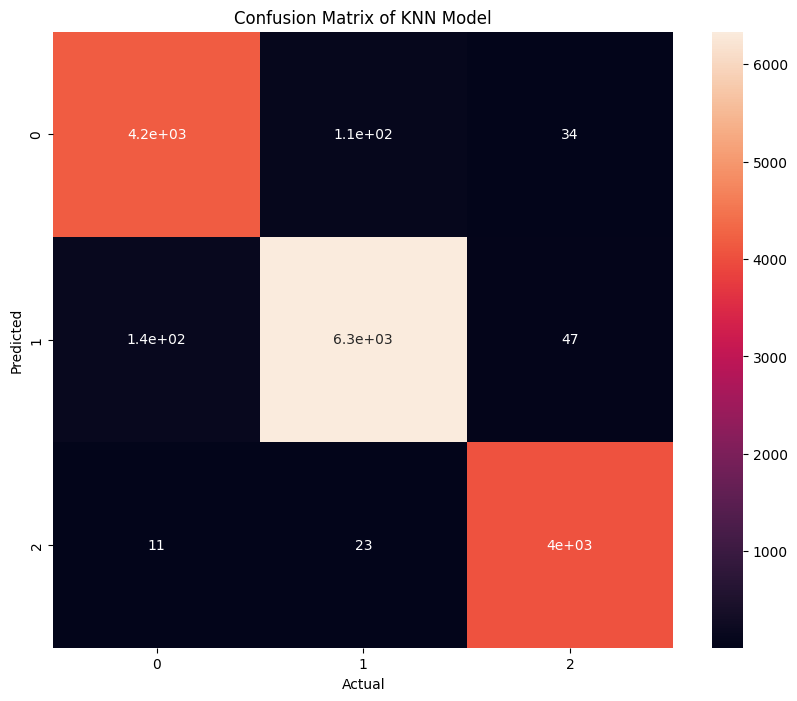

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)
plt.title("Confusion Matrix of KNN Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## SVC(kernel = rbf)

------------------------------>Testing plots of diffferent features<------------------------------



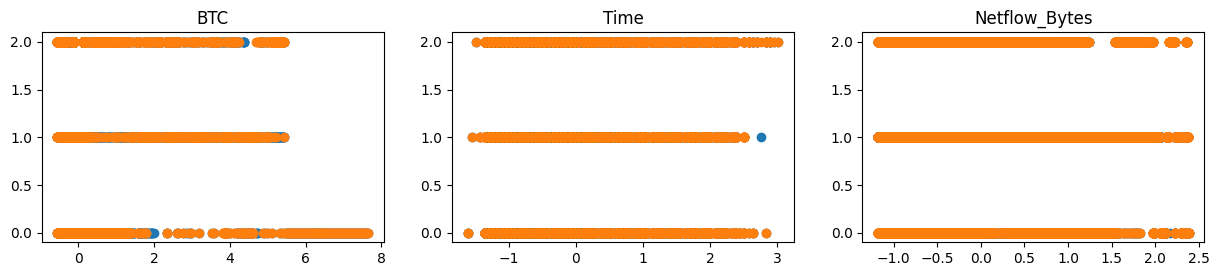

                                          METRICS OF MODEL                                          
Training accuracy --------> 0.9791
Testing accuracy --------> 0.9743
Training f1_Score ---------> 0.9791
Testing f1_Score ---------> 0.9743
                                               Errors                                               


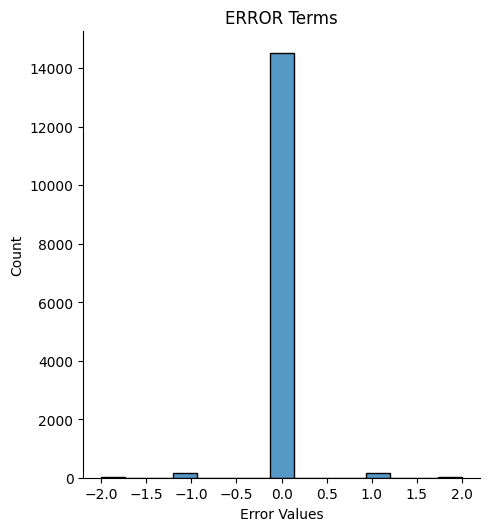

In [47]:
#kernel version of SVC

rbf = SVC(kernel = "rbf",C=10,class_weight="balanced")# class_weight,gamma , degree , C,probability,shrinking
rbf.fit(x_train_std,y_train)

y_pred1 = rbf.predict(x_train_std)
y_pred2 = rbf.predict(x_test_std)

Evaluation(x_train_std,x_test_std,y_train,y_test,y_pred1,y_pred2,2)

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)
plt.title("Confusion Matrix of SVC(Kernel = 'Gussian') Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## Ensemble and Trees methods

In [ ]:
# Decisiontreeclassifier

dtc = DecisionTreeClassifier(criterion="gini",class_weight ="balanced",splitter="random",random_state=42,min_samples_split=9,max_features=90)
dtc.fit(x_train_std,y_train)

y_pred1 = dtc.predict(x_train_std)
y_pred2 = dtc.predict(x_test_std)

Evaluation(x_train_std,x_test_std,y_train,y_test,y_pred1,y_pred2,3)

> ### 🔑**Note:** In decisiontree models if the model overfits then it might be the result of learning data linearly so change splitter from 'best' to 'random' while selecting random choose random_state to produce data multiple times.
try to change the following hyperparameters below:
* `min_samples_split`
* `min_samples_leaf`
* `max_features`
* `max_leaf_nodes`
* `class_weight = balanced`

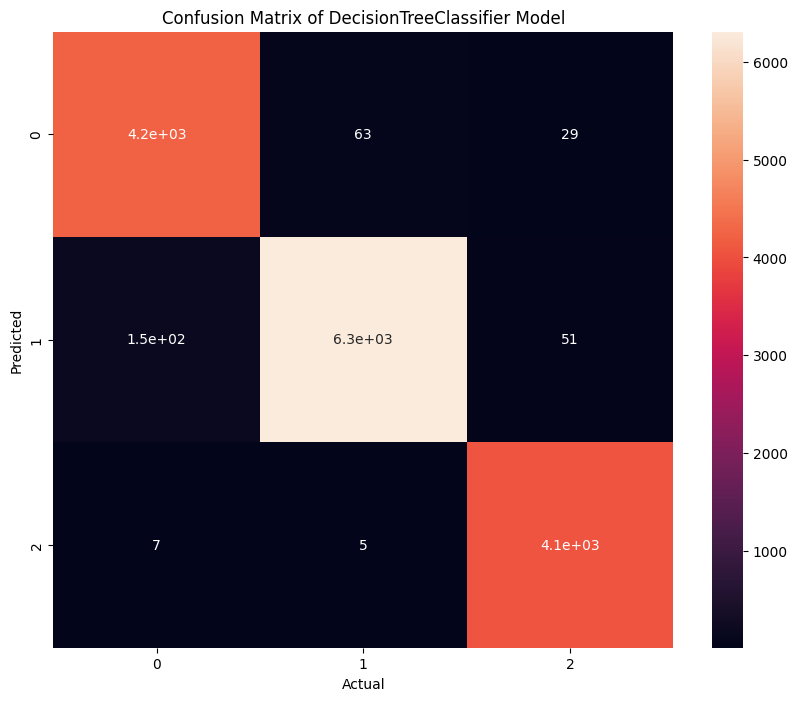

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)
plt.title("Confusion Matrix of DecisionTreeClassifier Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

------------------------------>Testing plots of diffferent features<------------------------------



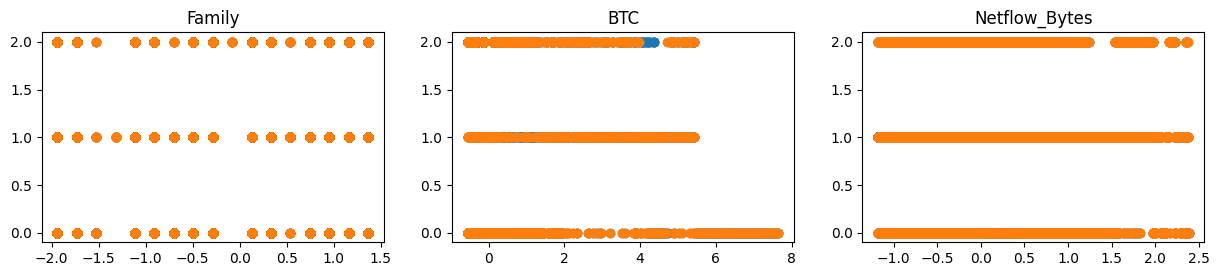

                                          METRICS OF MODEL                                          
Training accuracy --------> 0.9973
Testing accuracy --------> 0.9777
Training f1_Score ---------> 0.9973
Testing f1_Score ---------> 0.9777
                                               Errors                                               


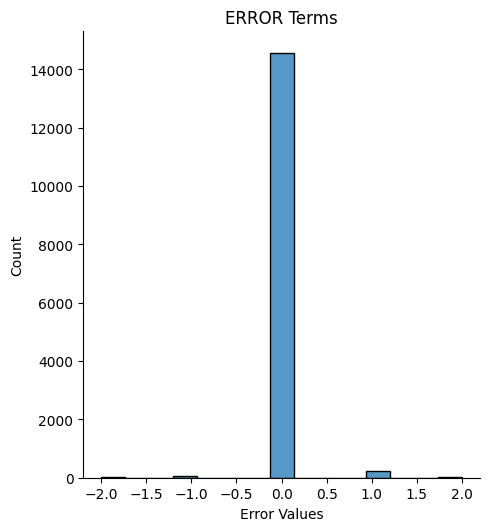

In [51]:
#ExtraTreeClassifier

etc = ExtraTreeClassifier(criterion="gini",random_state=123,min_samples_split=3,max_features=len(x_train_std))
etc.fit(x_train_std,y_train)

y_pred1 = etc.predict(x_train_std)
y_pred2 = etc.predict(x_test_std)

Evaluation(x_train_std,x_test_std,y_train,y_test,y_pred1,y_pred2,4)

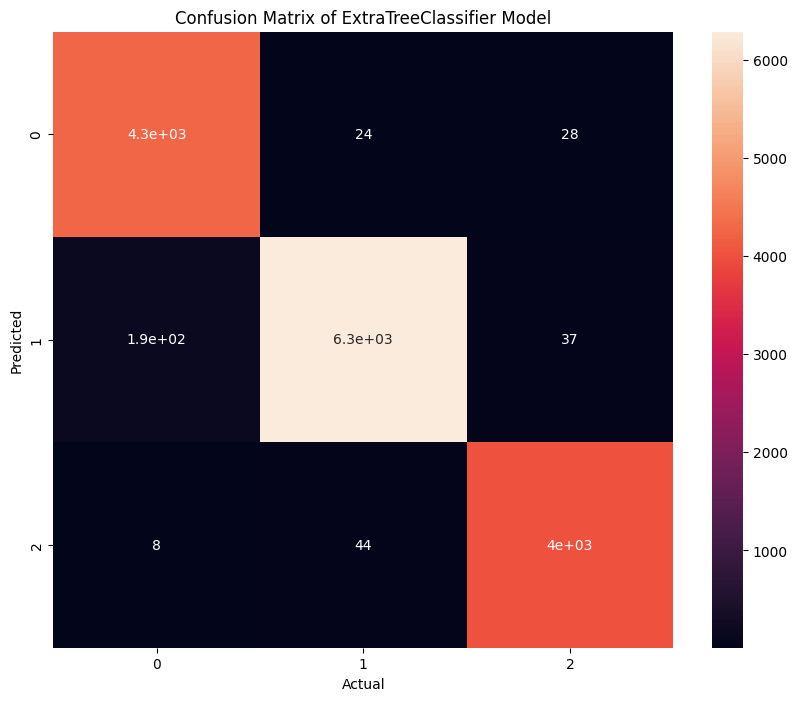

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)
plt.title("Confusion Matrix of ExtraTreeClassifier Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [53]:
Comparison_matrix.to_csv("drive/MyDrive/Colab Notebooks/comparison_models_classification.csv",index =False)

In [54]:
pd.read_csv("/content/drive/MyDrive/Colab Notebooks/comparison_models_classification.csv")


,Train_accuracy,Test_accuracy,Train_f1,Test_f1
0,0.8960,0.8986,0.8934,0.8960
1,0.9976,0.9759,0.9976,0.9759
2,0.9791,0.9743,0.9791,0.9743
3,0.9963,0.9793,0.9963,0.9793
4,0.9973,0.9777,0.9973,0.9777
5,0.0000,0.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,0.0000
9,0.0000,0.0000,0.0000,0.0000


## Voting Classifier

In [55]:
# Using votting_classifier 'hard' and 'soft' parameter to know which parameter generalizing more

from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[("lnrsvc",lnrsvc),("knn",knn),("dtc",dtc),("etc",etc)],voting="hard")

for clf in (lnrsvc,knn,etc,dtc,vc):
  clf.fit(x_train_std,y_train)
  print(clf.__class__.__name__,clf.score(x_test_std,y_test))



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC 0.9064072458906407
KNeighborsClassifier 0.9759141227775914
ExtraTreeClassifier 0.9776585038577659
DecisionTreeClassifier 0.9792687017779269
[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


VotingClassifier 0.9817510902381751


------------------------------>Testing plots of diffferent features<------------------------------



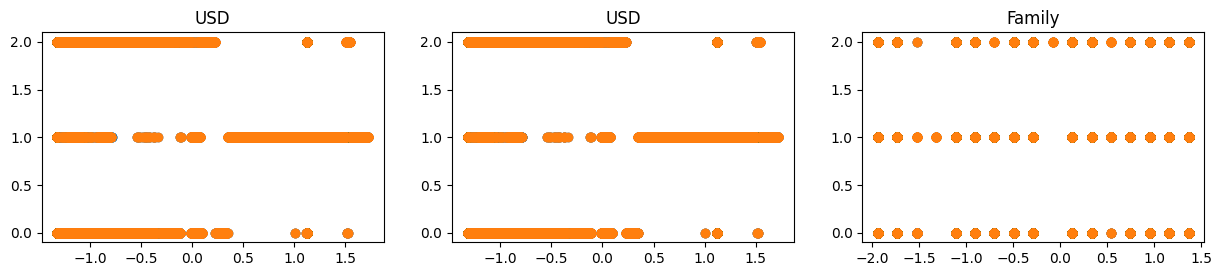

                                          METRICS OF MODEL                                          
Training accuracy --------> 0.9972
Testing accuracy --------> 0.9818
Training f1_Score ---------> 0.9972
Testing f1_Score ---------> 0.9818
                                               Errors                                               


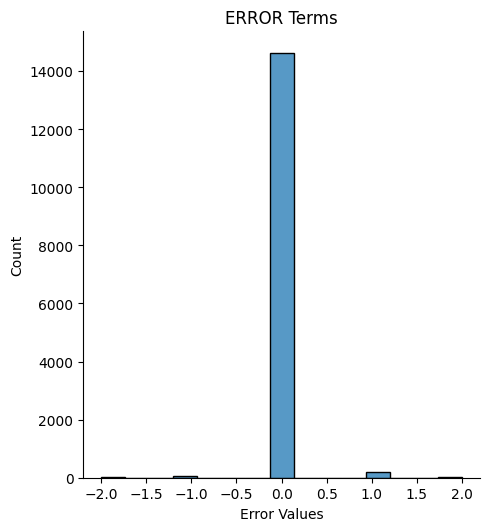

In [56]:
y_pred1 = vc.predict(x_train_std)
y_pred2 = vc.predict(x_test_std)

Evaluation(x_train_std,x_test_std,y_train,y_test,y_pred1,y_pred2,5)

In [57]:
# cheking soft voting
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[("rbf",SVC(kernel = "rbf",class_weight = "balanced",C=10,probability=True)),("knn",knn),("dtc",dtc),("etc",etc)],voting="soft")

for clf in (rbf,knn,etc,dtc,vc):
  clf.fit(x_train_std,y_train)
  print(clf.__class__.__name__,clf.score(x_test_std,y_test))


SVC 0.9743039248574304
KNeighborsClassifier 0.9759141227775914
ExtraTreeClassifier 0.9776585038577659
DecisionTreeClassifier 0.9792687017779269
VotingClassifier 0.9829587386782959


------------------------------>Testing plots of diffferent features<------------------------------



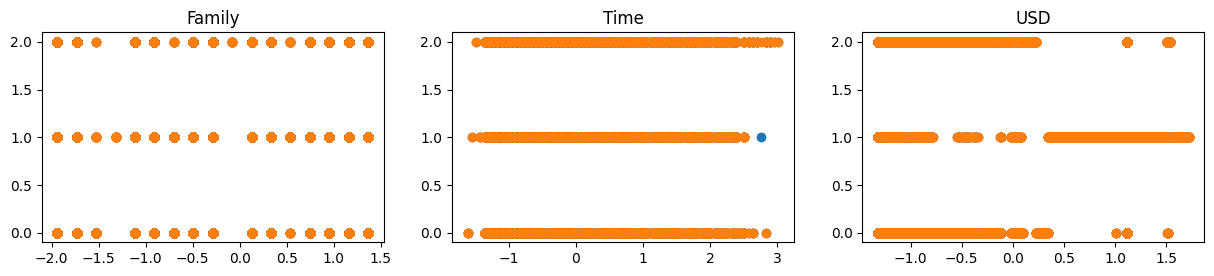

                                          METRICS OF MODEL                                          
Training accuracy --------> 0.9975
Testing accuracy --------> 0.983
Training f1_Score ---------> 0.9975
Testing f1_Score ---------> 0.983
                                               Errors                                               


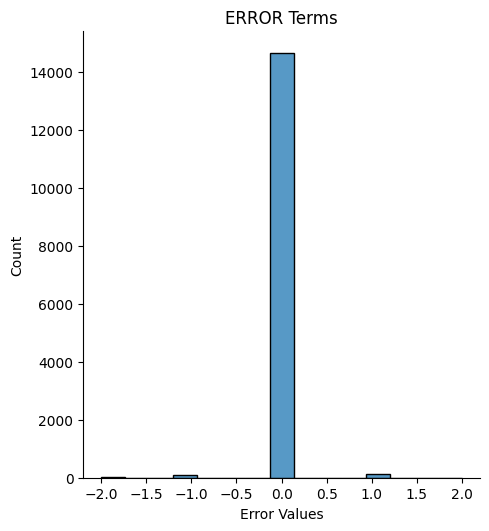

In [58]:
y_pred1 = vc.predict(x_train_std)
y_pred2 = vc.predict(x_test_std)

Evaluation(x_train_std,x_test_std,y_train,y_test,y_pred1,y_pred2,5)

### 🔑**Note:** In VotingClassifier setting up voting parameter as hard predicts the output by taking majority of votes of a class while soft selects the output by taking highest average probability of a class . while choosing `soft` parameter make sure all classifiers has *probability* as score evaluation metrics.

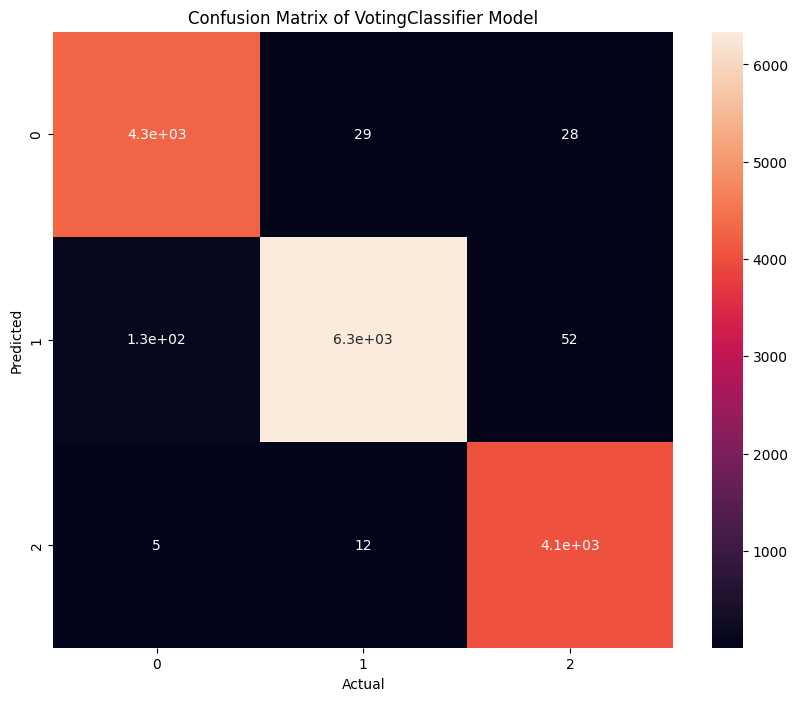

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)
plt.title("Confusion Matrix of VotingClassifier Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [60]:
Comparison_matrix

,Train_accuracy,Test_accuracy,Train_f1,Test_f1
0,0.8960,0.8986,0.8934,0.8960
1,0.9976,0.9759,0.9976,0.9759
2,0.9791,0.9743,0.9791,0.9743
3,0.9963,0.9793,0.9963,0.9793
4,0.9973,0.9777,0.9973,0.9777
5,0.9975,0.9830,0.9975,0.9830
6,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,0.0000
9,0.0000,0.0000,0.0000,0.0000


## BaggingClassifier

------------------------------>Testing plots of diffferent features<------------------------------



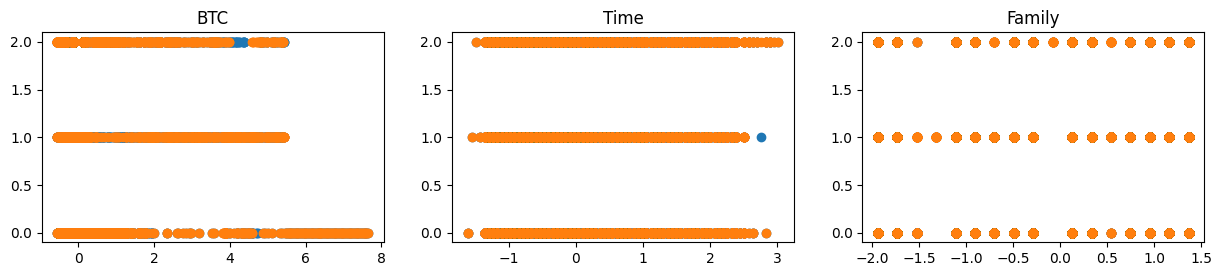

                                          METRICS OF MODEL                                          
Training accuracy --------> 0.9954
Testing accuracy --------> 0.984
Training f1_Score ---------> 0.9954
Testing f1_Score ---------> 0.984
                                               Errors                                               


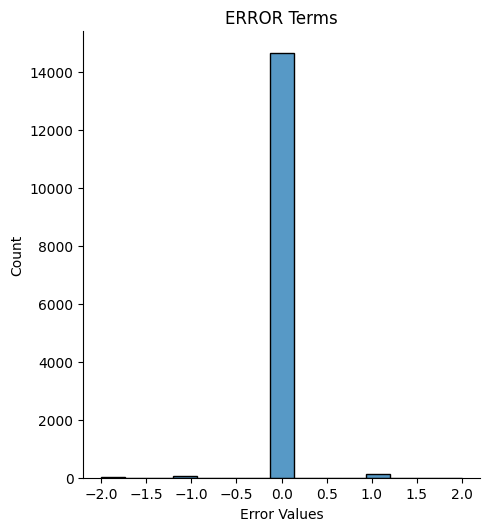

In [61]:
# Checking how BaggingClassifier works on our data

bag = BaggingClassifier(estimator = dtc,n_estimators = 100,oob_score = True,bootstrap_features=True,max_features=42)

bag.fit(x_train_std,y_train)
# bscore(x_test_std,y_test)

y_pred1 = bag.predict(x_train_std)
y_pred2 = bag.predict(x_test_std)

Evaluation(x_train_std,x_test_std,y_train,y_test,y_pred1,y_pred2,6)

### 🔑**Note:** First let's know about what is BaggingClassifier ,it generally doesn't have any specific algo , it impliments the algorithm of the `estimator`  we provided after making small changes in data batches for training like random selection and random_features_selection by turning on `bootstrap_features`.

In [62]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4316
           1       0.99      0.98      0.98      6516
           2       0.98      0.99      0.99      4073

    accuracy                           0.98     14905
   macro avg       0.98      0.99      0.98     14905
weighted avg       0.98      0.98      0.98     14905



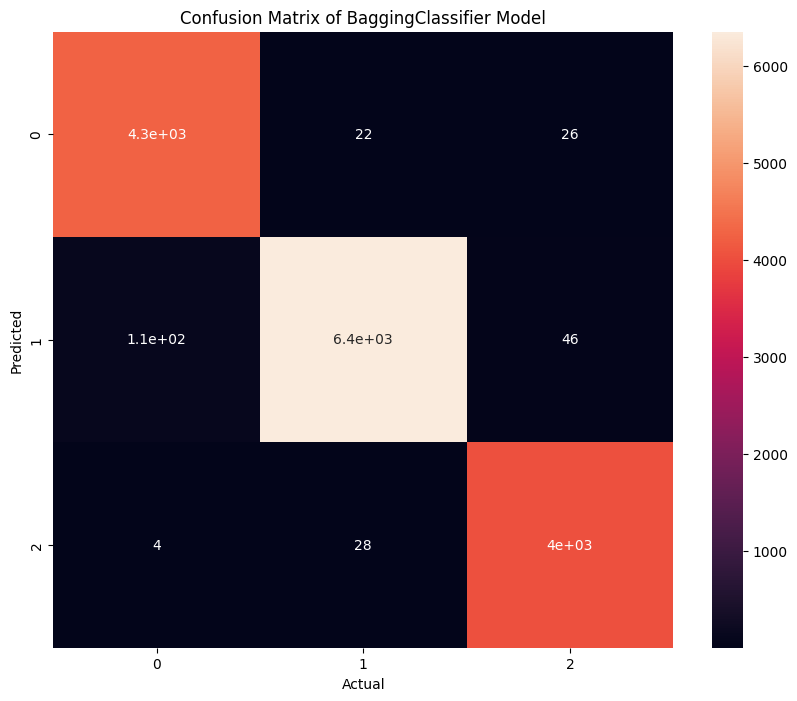

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)
plt.title("Confusion Matrix of BaggingClassifier Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## AdaptiveBoosting (AdaBoost) Technique

> ### In this algorithm , new_predictors(estimators) correct its predecessor errors by paying more attention to the training instances that are `underfitted` by predecessor.
* sklearn uses SAMME.R(Default) converges faster and SAMME (Stagewise Adaptive Modelling and Multiclass Exponential loss function) .


------------------------------>Testing plots of diffferent features<------------------------------



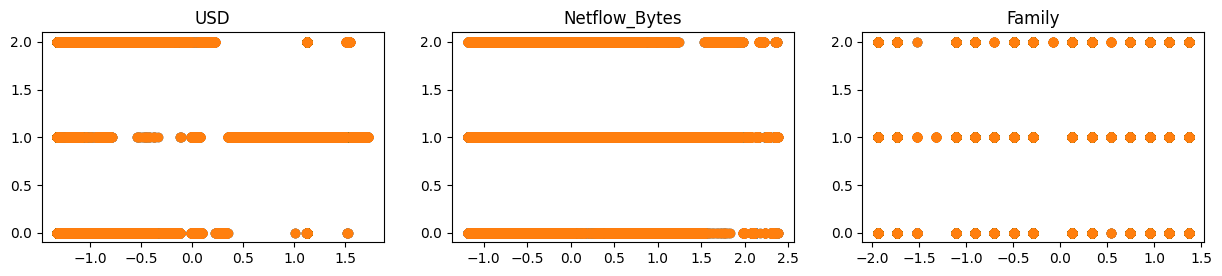

                                          METRICS OF MODEL                                          
Training accuracy --------> 0.9976
Testing accuracy --------> 0.9827
Training f1_Score ---------> 0.9976
Testing f1_Score ---------> 0.9827
                                               Errors                                               


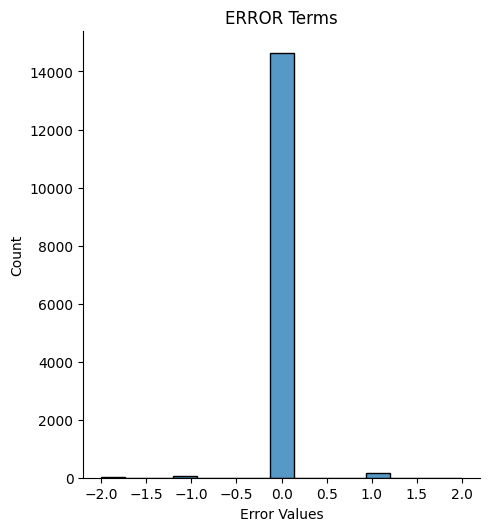

In [64]:
# using Adaptive learning technique

ada_clf = AdaBoostClassifier(estimator=etc,n_estimators = 100,learning_rate = 0.4,algorithm="SAMME.R" ) # here i select Extratrees , u can select any algorithm
ada_clf.fit(x_train_std,y_train)
# ada_clf.score(x_test_std,y_test)

y_pred1 = ada_clf.predict(x_train_std)
y_pred2 = ada_clf.predict(x_test_std)

Evaluation(x_train_std,x_test_std,y_train,y_test,y_pred1,y_pred2,7)

### 🔑**Note:** If AdaBoostingClassifier or anyother is not regularizing for its best then , increasing the `n_estimators` and decreasing the `learning_rate` enhances regularization. this type of regularization is called *Shrinkage*.



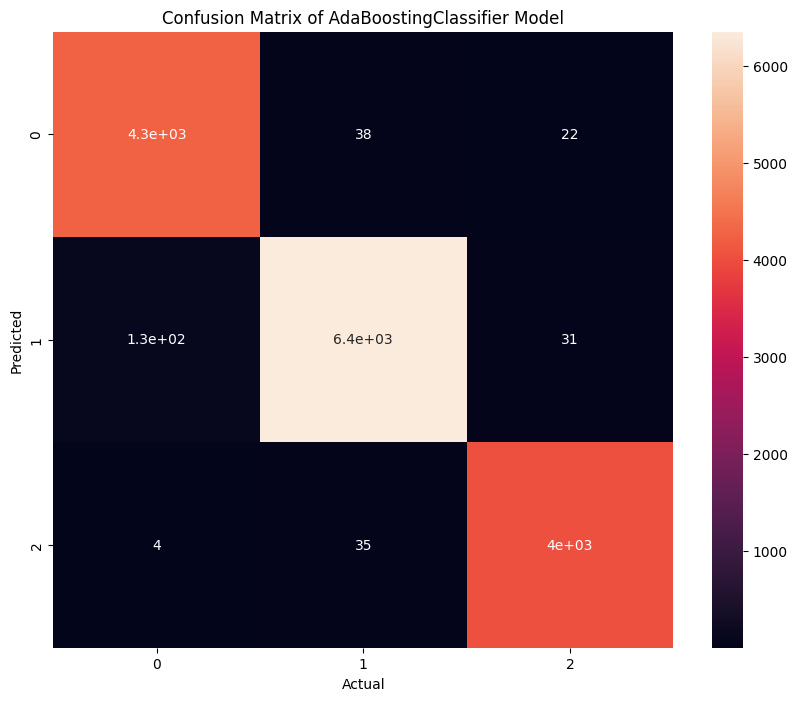

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)
plt.title("Confusion Matrix of AdaBoostingClassifier Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## GradientBoostingClassifier
> ### In AdaBoost algorith the new_predictors learn by increasing the weights of the samples wrongly predicted by previous predictor(estimator). while in this algorithm the new_predictor learns the error value of previous sample e.g. if y = 6 , let's assume predictor_1 estimates it as 4 then y_error = 2 is the new label to x_train of that sample for new predictor atlast the estimation of a label is done by adding sum(y_predictor_1 +y_predictor_2....) .

In [66]:
# Using GradientBoosting Technique

gbc = GradientBoostingClassifier(learning_rate = 0.05,n_estimators=250)
gbc.fit(x_train_std,y_train)

gbc.score(x_test_std,y_test)

0.9502851392150286

In [68]:
# finding_best_estimator

gbc = GradientBoostingClassifier(learning_rate = 0.03,n_estimators=600,max_features=20,min_samples_leaf=3,min_samples_split=20)
gbc.fit(x_train_std[30000:],y_train[30000:])

acc = [accuracy_score(y_test,y_pred ) for y_pred in gbc.staged_predict(x_test_std)]
bst_n_estimator = np.argmax(acc)
bst_n_estimator


534

------------------------------>Testing plots of diffferent features<------------------------------



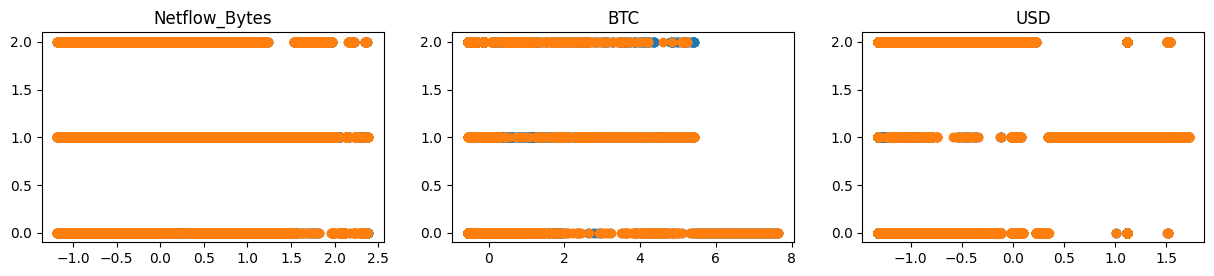

                                          METRICS OF MODEL                                          
Training accuracy --------> 0.9788
Testing accuracy --------> 0.9583
Training f1_Score ---------> 0.9788
Testing f1_Score ---------> 0.9585
                                               Errors                                               


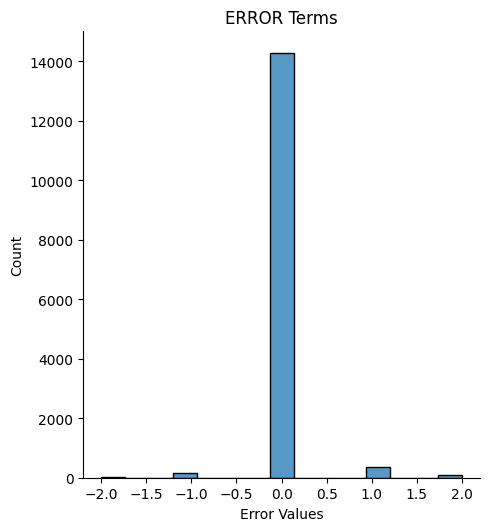

In [69]:
# final model

gbc = GradientBoostingClassifier(n_estimators = bst_n_estimator, learning_rate = 0.03,max_features = 20, min_samples_leaf = 3 , min_samples_split=20)
gbc.fit(x_train_std,y_train)

y_pred1 = gbc.predict(x_train_std)
y_pred2 = gbc.predict(x_test_std)

Evaluation(x_train_std,x_test_std,y_train,y_test,y_pred1,y_pred2,8)

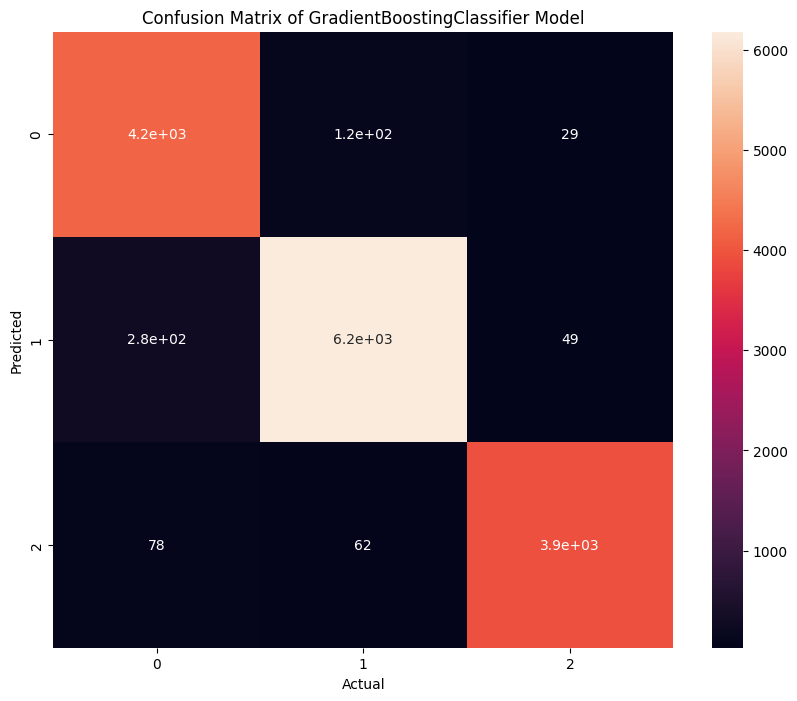

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)
plt.title("Confusion Matrix of GradientBoostingClassifier Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## RandomForestClassifier

In [71]:
# # let's come to my favourite algorithm

# rfc = RandomForestClassifier()
# grid = GridSearchCV(estimator=RandomForestClassifier(warm_start=True),param_grid={"max_features":["log2","sqrt"],"max_depth":[10,12,8],"min_samples_split":[2,3,4],"criterion":["gini","log_loss","entropy"],"n_estimators":[200,300,400,450]},verbose=2)


# grid.fit(x_train_std,y_train)

------------------------------>Testing plots of diffferent features<------------------------------



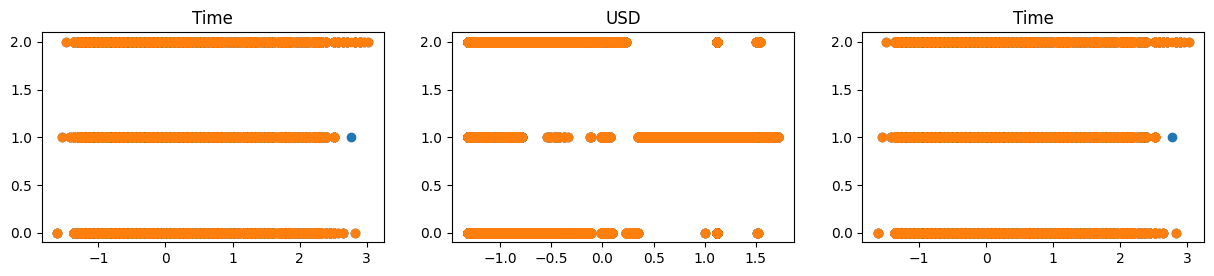

                                          METRICS OF MODEL                                          
Training accuracy --------> 0.9956
Testing accuracy --------> 0.9748
Training f1_Score ---------> 0.9956
Testing f1_Score ---------> 0.9748
                                               Errors                                               


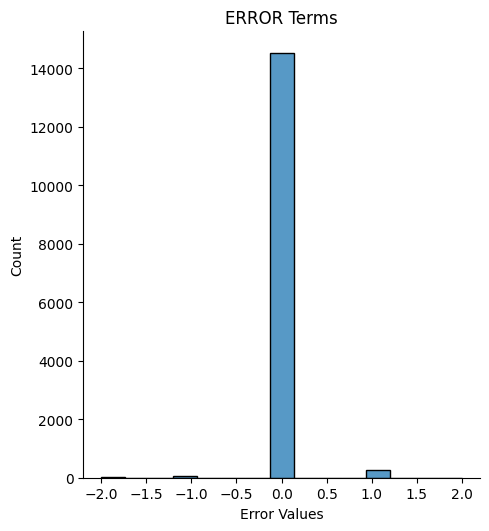

In [72]:
# finalising the model with best params

rfc = RandomForestClassifier(n_estimators = 600,max_features = "sqrt",max_depth = 18,min_samples_split = 3,criterion="entropy") # Taking the params after tweaking like hit and trail method
rfc.fit(x_train_std,y_train)

y_pred1 = rfc.predict(x_train_std)
y_pred2 = rfc.predict(x_test_std)

Evaluation(x_train_std,x_test_std,y_train,y_test,y_pred1,y_pred2,9)

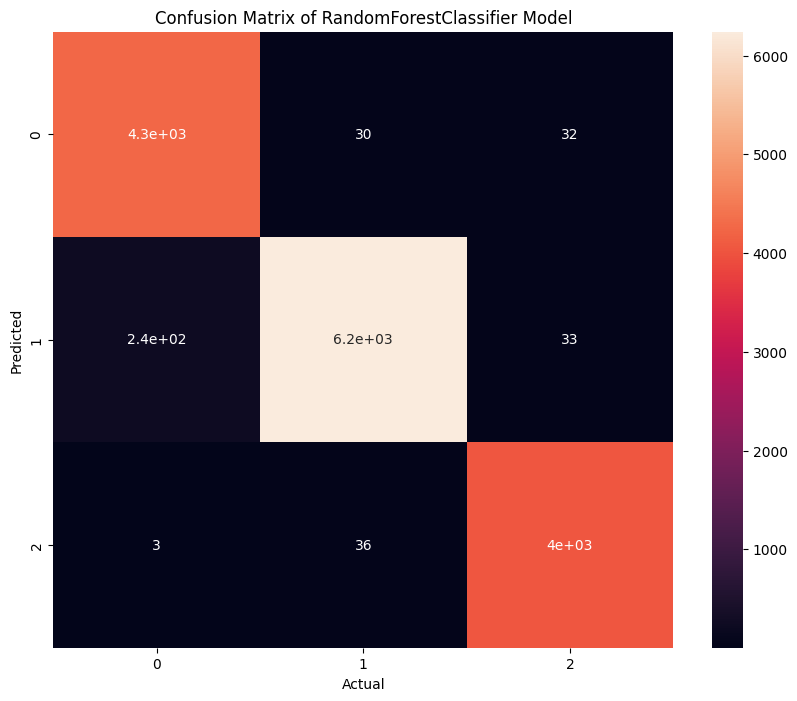

In [73]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)
plt.title("Confusion Matrix of RandomForestClassifier Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## XGBOOST Classifier
* Highly Optimised Version of GradientBoostingClassifier

In [75]:
import xgboost
xgb = XGBClassifier(n_estimators = 200,max_depth = 10, learning_rate = 1)
xgb.fit(x_train_std[:30000],y_train[:30000])

xgb.score(x_test_std,y_test)

0.8082522643408252

In [76]:
Comparison_matrix.to_csv("drive/MyDrive/Colab Notebooks/comparison_models_classification.csv",index =False)

In [77]:
# Classificatoin Models Results Evaluation

EMC = Comparison_matrix.copy()
EMC.index = ["LinearSVC","KNN","SVC(kernel='rbf')","DecisionTreeClassifier","ExtraTreeClassifier","VotingClassifier","BaggingClassifier","AdaBoostClassifier","GradientBoosting","RandomForestClassifier"]
EMC

,Train_accuracy,Test_accuracy,Train_f1,Test_f1
LinearSVC,0.8960,0.8986,0.8934,0.8960
KNN,0.9976,0.9759,0.9976,0.9759
SVC(kernel='rbf'),0.9791,0.9743,0.9791,0.9743
DecisionTreeClassifier,0.9963,0.9793,0.9963,0.9793
ExtraTreeClassifier,0.9973,0.9777,0.9973,0.9777
VotingClassifier,0.9975,0.9830,0.9975,0.9830
BaggingClassifier,0.9954,0.9840,0.9954,0.9840
AdaBoostClassifier,0.9976,0.9827,0.9976,0.9827
GradientBoosting,0.9788,0.9583,0.9788,0.9585
RandomForestClassifier,0.9956,0.9748,0.9956,0.9748


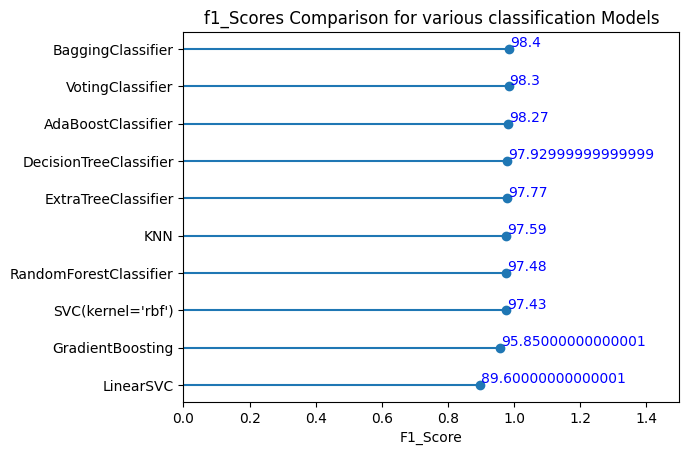

In [95]:
# f1-Scores Comparison for different classification Models

f1 = round(EMC['Test_f1'].sort_values(ascending=True),4)
plt.hlines(y=f1.index, xmin=0, xmax=f1.values)
plt.plot(f1.values, f1.index,'o')
plt.title('f1_Scores Comparison for various classification Models')
plt.xlabel('F1_Score')

for i, v in enumerate(f1):
    plt.text(v+0.003, i+0.05, str(v*100), color='blue')
plt.xlim([0,1.5])
plt.show()

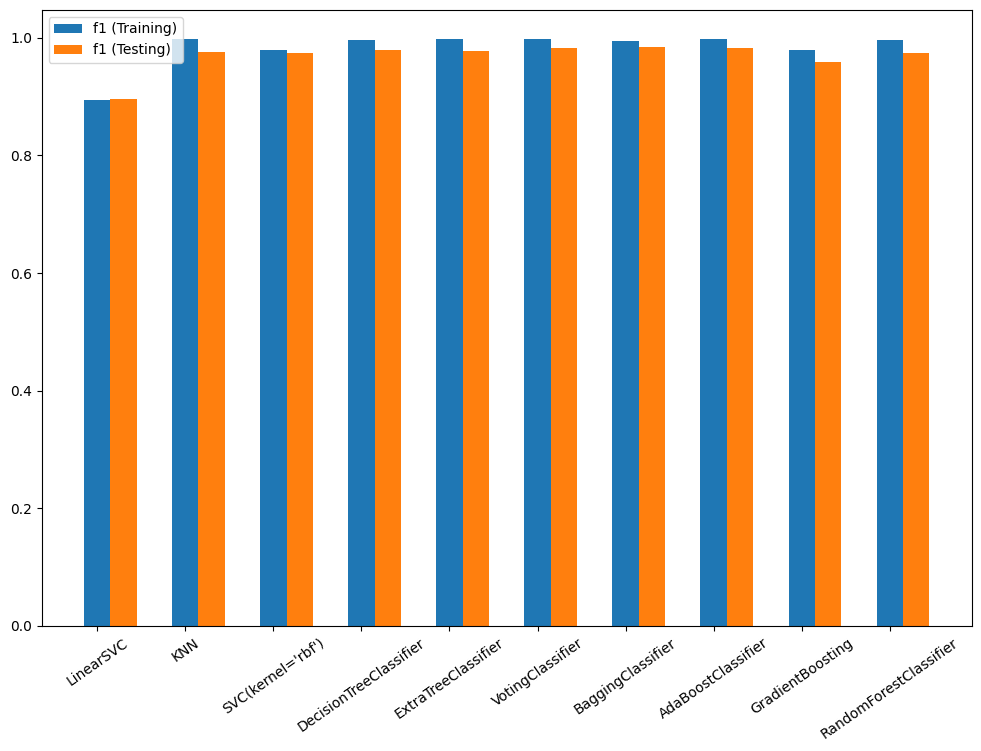

In [93]:
# comparing the models

cc = Comparison_matrix.columns.values
s=5
plt.figure(figsize=(12,8))
plt.bar(np.arange(10), Comparison_matrix[cc[2]].values, width=0.3, label='f1 (Training)')
plt.bar(np.arange(10)+0.3, Comparison_matrix[cc[3]].values, width=0.3, label='f1 (Testing)')
# plt.plot([0,10],[.984,.984])
plt.xticks(np.arange(10),EMC.index, rotation =35)
plt.legend()
# plt.ylim([0,35])
plt.show()